In [7]:
!pip install sklearn

Processing c:\users\sjszz\appdata\local\pip\cache\wheels\46\ef\c3\157e41f5ee1372d1be90b09f74f82b10e391eaacca8f22d33e\sklearn-0.0-py2.py3-none-any.whl
  Using cached scikit_learn-0.23.2-cp37-cp37m-win_amd64.whl (6.8 MB)
  Using cached threadpoolctl-2.1.0-py3-none-any.whl (12 kB)


In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split

# 맷플롯립 한글 폰트 지정
import platform
from matplotlib import font_manager, rc

# 한글 설정시 마이너스 부호 깨지는 것 방지
plt.rcParams['axes.unicode_minus'] = False

if platform.system() == 'Darwin':
    # mac
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':
    # windows
    path = "c:/Windows/Fonts/malgun.ttf"
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print('Unknown system... sorry~~~~')

# 데이터 로드

In [9]:
housing = pd.read_csv('housing.csv',encoding='cp949')
housing

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [10]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [9]:
housing.describe(include='all')

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,<1H OCEAN
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9136
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909,NaN
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874,NaN
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000,NaN
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000,NaN
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000,NaN
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000,NaN


In [11]:
housing['ocean_proximity'].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

# histogram

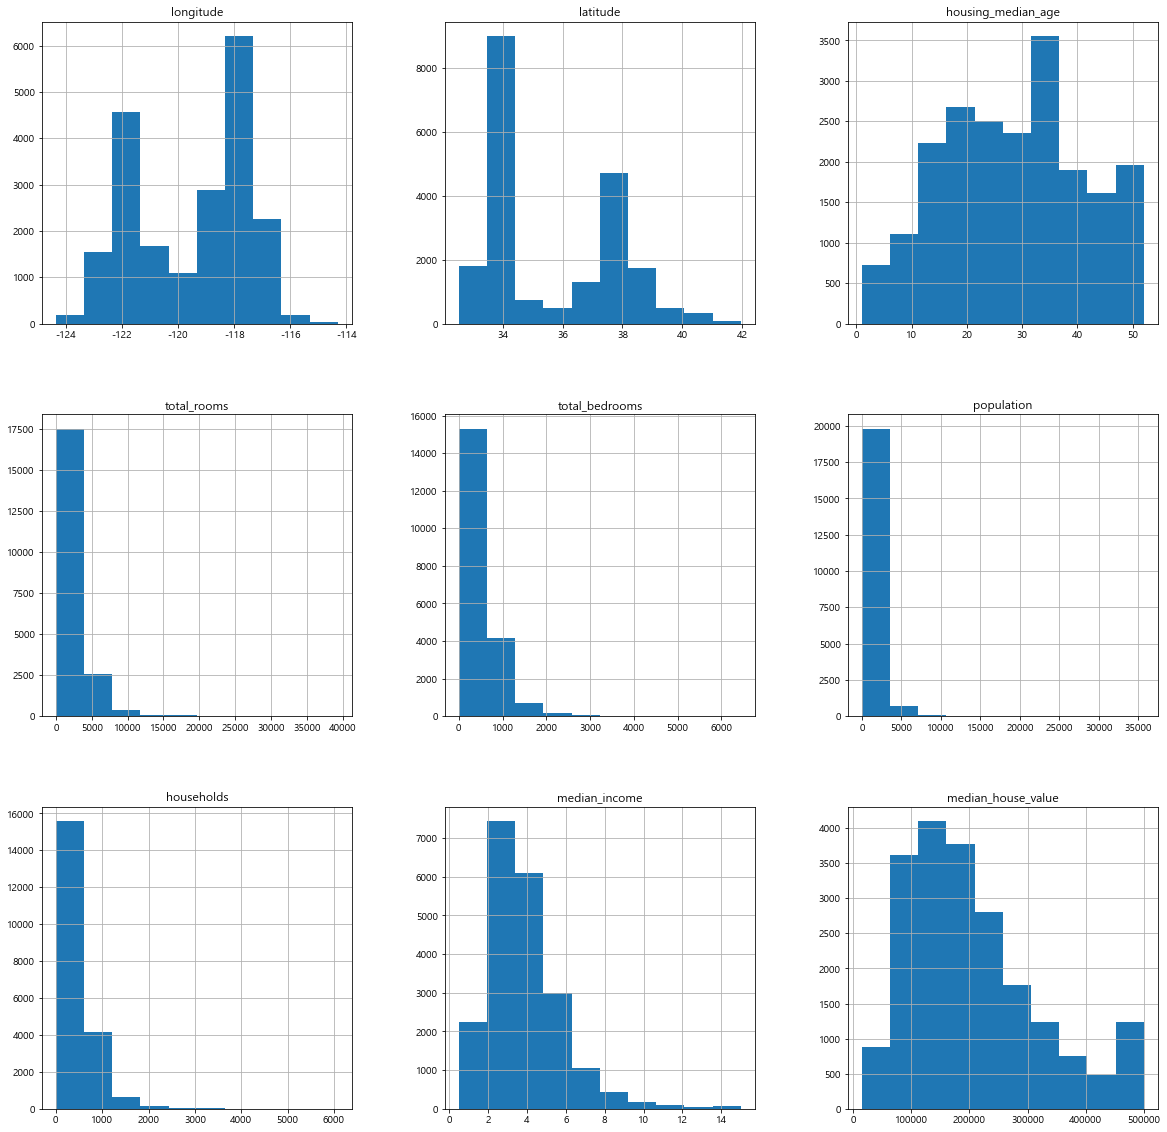

In [13]:
housing.hist(figsize=(20,20))
plt.show()

In [14]:
housing_origin = housing[:] #housing.copy()
housing_origin.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


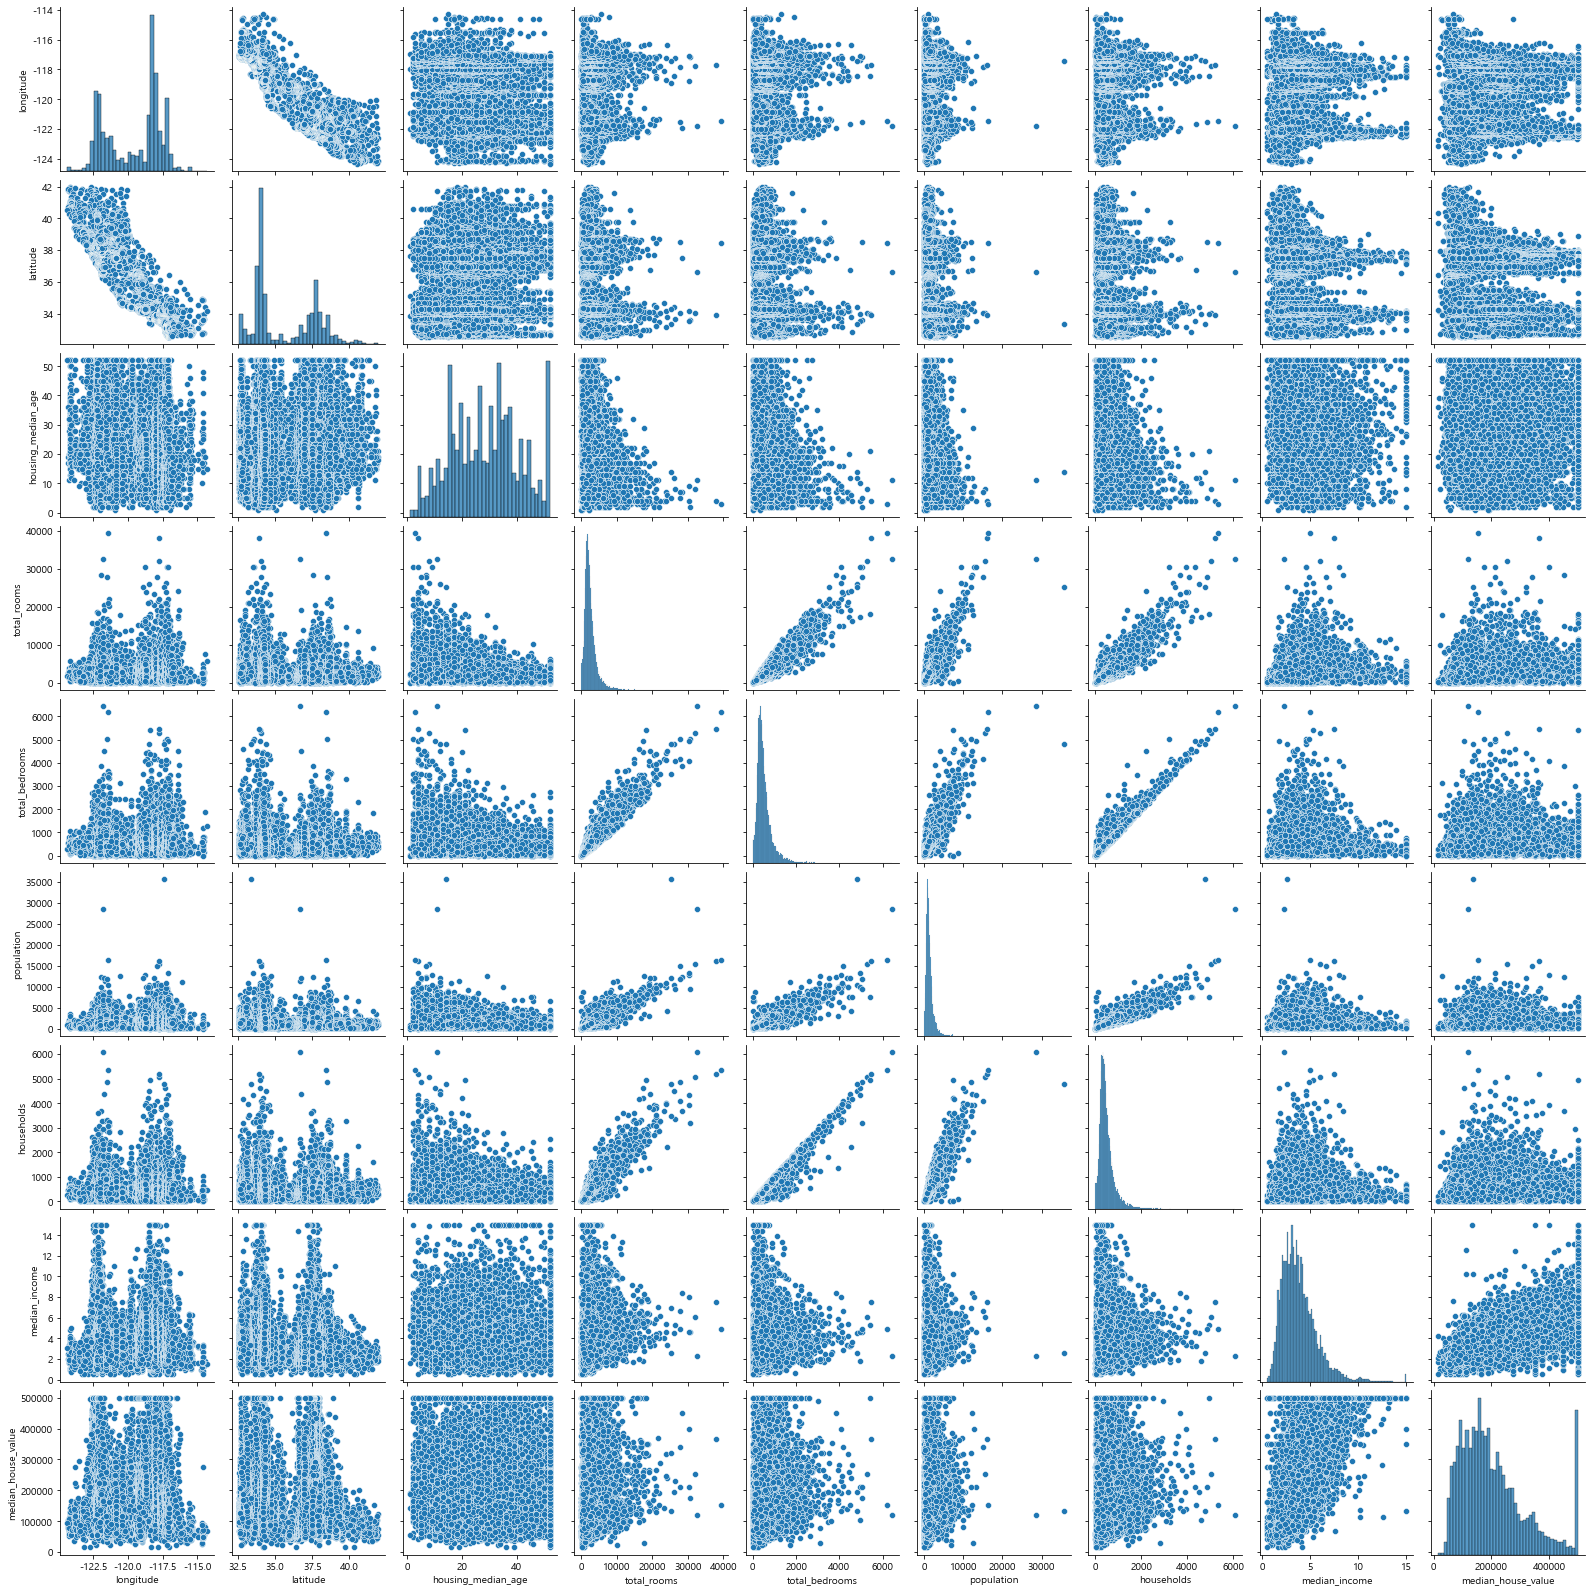

In [15]:
sns.pairplot(housing)

In [16]:
housing.corr()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000000,-0.924664,-0.108197,0.044568,0.069608,0.099773,0.055310,-0.015176,-0.045967
latitude,-0.924664,1.000000,0.011173,-0.036100,-0.066983,-0.108785,-0.071035,-0.079809,-0.144160
housing_median_age,-0.108197,0.011173,1.000000,-0.361262,-0.320451,-0.296244,-0.302916,-0.119034,0.105623
total_rooms,0.044568,-0.036100,-0.361262,1.000000,0.930380,0.857126,0.918484,0.198050,0.134153
total_bedrooms,0.069608,-0.066983,-0.320451,0.930380,1.000000,0.877747,0.979728,-0.007723,0.049686
population,0.099773,-0.108785,-0.296244,0.857126,0.877747,1.000000,0.907222,0.004834,-0.024650
households,0.055310,-0.071035,-0.302916,0.918484,0.979728,0.907222,1.000000,0.013033,0.065843
median_income,-0.015176,-0.079809,-0.119034,0.198050,-0.007723,0.004834,0.013033,1.000000,0.688075
median_house_value,-0.045967,-0.144160,0.105623,0.134153,0.049686,-0.024650,0.065843,0.688075,1.000000


<AxesSubplot:>

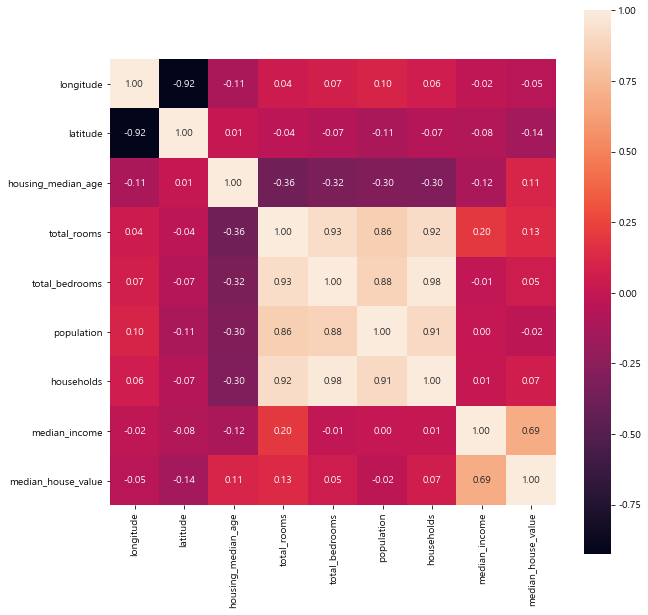

In [18]:
plt.figure(figsize=(10,10))
sns.heatmap(housing.corr(),annot=True,fmt=".2f",square=True) #fmt = 소수자리 square 정사각형

In [24]:
housing.corr()['median_house_value'].abs().sort_values(ascending=False)

median_house_value    1.000000
median_income         0.688075
latitude              0.144160
total_rooms           0.134153
housing_median_age    0.105623
households            0.065843
total_bedrooms        0.049686
longitude             0.045967
population            0.024650
Name: median_house_value, dtype: float64

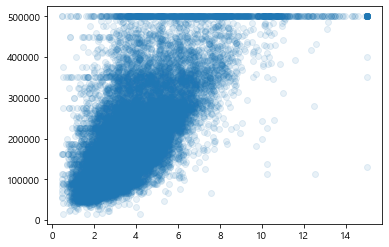

In [29]:
plt.scatter(housing['median_income'],housing['median_house_value'],alpha=0.1) #직선은 누군가 자른거다?

<AxesSubplot:xlabel='median_house_value'>

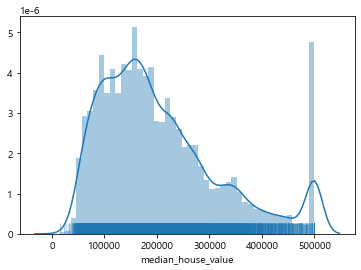

In [32]:
sns.distplot(housing['median_house_value'],rug=True, rug_kws={'alpha':0.1})

# 지리데이터

In [38]:
housing.keys()

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'],
      dtype='object')

<Figure size 432x288 with 0 Axes>

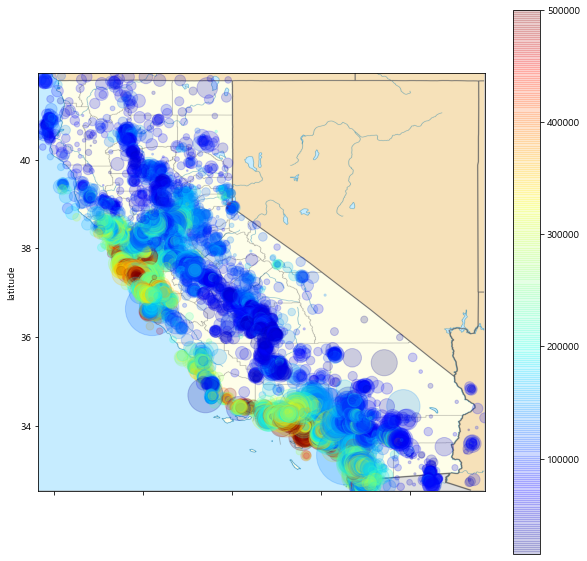

In [19]:
plt.figure()
housing.plot.scatter(x='longitude',
                     y='latitude',
                     s=housing['population']/10,
                     alpha=0.2,
                     figsize=(10,10),
                     c=housing['median_house_value'],
                     cmap=plt.get_cmap('jet')) #빨갈수록 집값이 비싸다
img = plt.imread('califonia.png')
plt.imshow(img,extent=[
    housing['longitude'].min(),housing['longitude'].max(),
    housing['latitude'].min(),housing['latitude'].max()
])
plt.show()

# 전처리

In [20]:
#인덱스 순서로 나눈 것
test_ratio = 0.2
train_data = housing.loc[:test_ratio*housing.shape[0],:] # 데이터 행(개수)
test_data = housing.loc[test_ratio*housing.shape[0]:,:]

In [21]:
np.random.seed(41)
idx_arr=np.random.permutation(housing.shape[0])
test_idx = idx_arr[:int(housing.shape[0]*test_ratio)]
train_idx = idx_arr[int(housing.shape[0]*test_ratio):]

train_data = housing.loc[train_idx,:]
test_data = housing.loc[test_idx,:]
train_data.shape, test_data.shape

((16512, 10), (4128, 10))

In [22]:
from sklearn.model_selection import train_test_split

In [53]:
X=housing.drop('median_house_value',axis=1)
y=housing['median_house_value']

In [54]:
X_train , X_test, y_train, y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [55]:
X_train.shape, X_test.shape, y_train.shape,y_test.shape

((16512, 9), (4128, 9), (16512,), (4128,))

In [56]:
X['ocean_proximity'].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [57]:
housing['ocean_proximity'].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [58]:
#stratify : 비율을 동일하게 해서 뽑는다
X_train , X_test, y_train, y_test=train_test_split(X,y,test_size=0.2,random_state=0,stratify=X['ocean_proximity'])

In [59]:
housing['ocean_proximity'].value_counts()/len(housing)

<1H OCEAN     0.442636
INLAND        0.317393
NEAR OCEAN    0.128779
NEAR BAY      0.110950
ISLAND        0.000242
Name: ocean_proximity, dtype: float64

In [60]:
X_train['ocean_proximity'].value_counts() / len(X_train)

<1H OCEAN     0.442648
INLAND        0.317406
NEAR OCEAN    0.128755
NEAR BAY      0.110950
ISLAND        0.000242
Name: ocean_proximity, dtype: float64

In [61]:
X_test['ocean_proximity'].value_counts() / len(X_test)

<1H OCEAN     0.442587
INLAND        0.317345
NEAR OCEAN    0.128876
NEAR BAY      0.110950
ISLAND        0.000242
Name: ocean_proximity, dtype: float64

## 결측지 처리

### 결측치 제거
1. 행제거

In [62]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16512 entries, 10261 to 11359
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           16512 non-null  float64
 1   latitude            16512 non-null  float64
 2   housing_median_age  16512 non-null  float64
 3   total_rooms         16512 non-null  float64
 4   total_bedrooms      16353 non-null  float64
 5   population          16512 non-null  float64
 6   households          16512 non-null  float64
 7   median_income       16512 non-null  float64
 8   ocean_proximity     16512 non-null  object 
dtypes: float64(8), object(1)
memory usage: 1.3+ MB


In [63]:
X_train[X_train['total_bedrooms'].isnull()]

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
738,-122.14,37.67,37.0,3342.0,NaN,1635.0,557.0,4.7933,NEAR BAY
16757,-122.48,37.70,33.0,4492.0,NaN,3477.0,1537.0,3.0546,NEAR OCEAN
4591,-118.28,34.06,42.0,2472.0,NaN,3795.0,1179.0,1.2254,<1H OCEAN
19559,-120.98,37.60,36.0,1437.0,NaN,1073.0,320.0,2.1779,INLAND
538,-122.28,37.78,29.0,5154.0,NaN,3741.0,1273.0,2.5762,NEAR BAY
...,...,...,...,...,...,...,...,...,...
2115,-119.72,36.76,23.0,6403.0,NaN,3573.0,1260.0,2.3006,INLAND
5236,-118.23,33.94,36.0,1110.0,NaN,1417.0,302.0,2.3333,<1H OCEAN
7097,-117.98,33.92,27.0,3700.0,NaN,1793.0,552.0,5.3668,<1H OCEAN
7330,-118.17,33.98,41.0,756.0,NaN,873.0,212.0,2.7321,<1H OCEAN


In [64]:
X_train.shape

(16512, 9)

In [65]:
X_train.dropna().shape

(16353, 9)

### 열제거

In [66]:
X_train.dropna(axis=1).shape

(16512, 8)

# 대표값으로 대체

In [67]:
X_train.median()

longitude             -118.50500
latitude                34.26000
housing_median_age      29.00000
total_rooms           2126.00000
total_bedrooms         436.00000
population            1170.00000
households             410.00000
median_income            3.53075
dtype: float64

In [68]:
median_value = X_train.median() #중앙값으로 결측치 채움
X_train.fillna(median_value)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
10261,-117.85,33.88,14.0,4753.0,681.0,2138.0,678.0,7.3658,<1H OCEAN
17574,-121.92,37.32,28.0,2089.0,641.0,1666.0,587.0,2.3633,<1H OCEAN
18304,-122.12,37.41,33.0,2892.0,617.0,1250.0,581.0,5.3727,NEAR BAY
8987,-118.37,33.99,32.0,4018.0,564.0,1400.0,568.0,8.6718,<1H OCEAN
3596,-118.49,34.24,34.0,1971.0,316.0,917.0,307.0,6.0965,<1H OCEAN
...,...,...,...,...,...,...,...,...,...
7411,-118.22,33.95,36.0,1679.0,483.0,2249.0,487.0,2.8167,<1H OCEAN
12754,-121.37,38.61,39.0,823.0,146.0,329.0,144.0,3.0833,INLAND
3405,-118.36,34.26,34.0,3677.0,573.0,1598.0,568.0,6.8380,<1H OCEAN
14295,-117.13,32.72,52.0,1560.0,307.0,757.0,315.0,2.7083,NEAR OCEAN


In [69]:
X_train.fillna(X_train.median()).describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
count,16512.000000,16512.000000,16512.000000,16512.000000,16512.000000,16512.000000,16512.000000,16512.000000
mean,-119.576302,35.636741,28.698159,2638.437318,537.498970,1433.163578,501.021621,3.862962
std,1.999541,2.134570,12.583490,2206.989208,422.122989,1156.825167,385.699394,1.899589
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900
25%,-121.790000,33.940000,18.000000,1450.000000,298.000000,788.000000,280.000000,2.556800
50%,-118.505000,34.260000,29.000000,2126.000000,436.000000,1170.000000,410.000000,3.530750
75%,-118.010000,37.720000,37.000000,3148.000000,644.000000,1724.250000,606.000000,4.738700
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100


In [70]:
X_train_origin = X_train.copy()

In [71]:
X_train = X_train.fillna(median_value)
X_train

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
10261,-117.85,33.88,14.0,4753.0,681.0,2138.0,678.0,7.3658,<1H OCEAN
17574,-121.92,37.32,28.0,2089.0,641.0,1666.0,587.0,2.3633,<1H OCEAN
18304,-122.12,37.41,33.0,2892.0,617.0,1250.0,581.0,5.3727,NEAR BAY
8987,-118.37,33.99,32.0,4018.0,564.0,1400.0,568.0,8.6718,<1H OCEAN
3596,-118.49,34.24,34.0,1971.0,316.0,917.0,307.0,6.0965,<1H OCEAN
...,...,...,...,...,...,...,...,...,...
7411,-118.22,33.95,36.0,1679.0,483.0,2249.0,487.0,2.8167,<1H OCEAN
12754,-121.37,38.61,39.0,823.0,146.0,329.0,144.0,3.0833,INLAND
3405,-118.36,34.26,34.0,3677.0,573.0,1598.0,568.0,6.8380,<1H OCEAN
14295,-117.13,32.72,52.0,1560.0,307.0,757.0,315.0,2.7083,NEAR OCEAN


## 특성조합

In [72]:
X_train.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
count,16512.000000,16512.000000,16512.000000,16512.000000,16512.000000,16512.000000,16512.000000,16512.000000
mean,-119.576302,35.636741,28.698159,2638.437318,537.498970,1433.163578,501.021621,3.862962
std,1.999541,2.134570,12.583490,2206.989208,422.122989,1156.825167,385.699394,1.899589
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900
25%,-121.790000,33.940000,18.000000,1450.000000,298.000000,788.000000,280.000000,2.556800
50%,-118.505000,34.260000,29.000000,2126.000000,436.000000,1170.000000,410.000000,3.530750
75%,-118.010000,37.720000,37.000000,3148.000000,644.000000,1724.250000,606.000000,4.738700
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100


In [73]:
X_train['total_rooms'].mean()

2638.4373183139537

In [74]:
X_train['households'].mean()

501.0216206395349

In [75]:
X_train['rooms_per_households']=X_train['total_rooms']/X_train['households']
X_train

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,rooms_per_households
10261,-117.85,33.88,14.0,4753.0,681.0,2138.0,678.0,7.3658,<1H OCEAN,7.010324
17574,-121.92,37.32,28.0,2089.0,641.0,1666.0,587.0,2.3633,<1H OCEAN,3.558773
18304,-122.12,37.41,33.0,2892.0,617.0,1250.0,581.0,5.3727,NEAR BAY,4.977625
8987,-118.37,33.99,32.0,4018.0,564.0,1400.0,568.0,8.6718,<1H OCEAN,7.073944
3596,-118.49,34.24,34.0,1971.0,316.0,917.0,307.0,6.0965,<1H OCEAN,6.420195
...,...,...,...,...,...,...,...,...,...,...
7411,-118.22,33.95,36.0,1679.0,483.0,2249.0,487.0,2.8167,<1H OCEAN,3.447639
12754,-121.37,38.61,39.0,823.0,146.0,329.0,144.0,3.0833,INLAND,5.715278
3405,-118.36,34.26,34.0,3677.0,573.0,1598.0,568.0,6.8380,<1H OCEAN,6.473592
14295,-117.13,32.72,52.0,1560.0,307.0,757.0,315.0,2.7083,NEAR OCEAN,4.952381


In [76]:
X_train['bedrooms_ratio']=X_train['total_bedrooms']/X_train['total_rooms']
X_train.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,rooms_per_households,bedrooms_ratio
10261,-117.85,33.88,14.0,4753.0,681.0,2138.0,678.0,7.3658,<1H OCEAN,7.010324,0.143278
17574,-121.92,37.32,28.0,2089.0,641.0,1666.0,587.0,2.3633,<1H OCEAN,3.558773,0.306845
18304,-122.12,37.41,33.0,2892.0,617.0,1250.0,581.0,5.3727,NEAR BAY,4.977625,0.213347
8987,-118.37,33.99,32.0,4018.0,564.0,1400.0,568.0,8.6718,<1H OCEAN,7.073944,0.140368
3596,-118.49,34.24,34.0,1971.0,316.0,917.0,307.0,6.0965,<1H OCEAN,6.420195,0.160325


In [77]:
X_train['pop_per_household']=X_train['population'] / X_train['households']
X_train

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,rooms_per_households,bedrooms_ratio,pop_per_household
10261,-117.85,33.88,14.0,4753.0,681.0,2138.0,678.0,7.3658,<1H OCEAN,7.010324,0.143278,3.153392
17574,-121.92,37.32,28.0,2089.0,641.0,1666.0,587.0,2.3633,<1H OCEAN,3.558773,0.306845,2.838160
18304,-122.12,37.41,33.0,2892.0,617.0,1250.0,581.0,5.3727,NEAR BAY,4.977625,0.213347,2.151463
8987,-118.37,33.99,32.0,4018.0,564.0,1400.0,568.0,8.6718,<1H OCEAN,7.073944,0.140368,2.464789
3596,-118.49,34.24,34.0,1971.0,316.0,917.0,307.0,6.0965,<1H OCEAN,6.420195,0.160325,2.986971
...,...,...,...,...,...,...,...,...,...,...,...,...
7411,-118.22,33.95,36.0,1679.0,483.0,2249.0,487.0,2.8167,<1H OCEAN,3.447639,0.287671,4.618070
12754,-121.37,38.61,39.0,823.0,146.0,329.0,144.0,3.0833,INLAND,5.715278,0.177400,2.284722
3405,-118.36,34.26,34.0,3677.0,573.0,1598.0,568.0,6.8380,<1H OCEAN,6.473592,0.155834,2.813380
14295,-117.13,32.72,52.0,1560.0,307.0,757.0,315.0,2.7083,NEAR OCEAN,4.952381,0.196795,2.403175


In [78]:
#corr을 위해 target value 추가
X_train['median_house_value'] = y_train
X_train.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,rooms_per_households,bedrooms_ratio,pop_per_household,median_house_value
10261,-117.85,33.88,14.0,4753.0,681.0,2138.0,678.0,7.3658,<1H OCEAN,7.010324,0.143278,3.153392,288500.0
17574,-121.92,37.32,28.0,2089.0,641.0,1666.0,587.0,2.3633,<1H OCEAN,3.558773,0.306845,2.838160,198400.0
18304,-122.12,37.41,33.0,2892.0,617.0,1250.0,581.0,5.3727,NEAR BAY,4.977625,0.213347,2.151463,360900.0
8987,-118.37,33.99,32.0,4018.0,564.0,1400.0,568.0,8.6718,<1H OCEAN,7.073944,0.140368,2.464789,439100.0
3596,-118.49,34.24,34.0,1971.0,316.0,917.0,307.0,6.0965,<1H OCEAN,6.420195,0.160325,2.986971,262300.0


In [79]:
X_train.corr()['median_house_value'].abs().sort_values(ascending=False)

median_house_value      1.000000
median_income           0.685890
bedrooms_ratio          0.232459
rooms_per_households    0.155358
latitude                0.146327
total_rooms             0.131691
housing_median_age      0.107947
households              0.064741
total_bedrooms          0.049800
longitude               0.043821
pop_per_household       0.033141
population              0.026682
Name: median_house_value, dtype: float64

## 스케일링

In [80]:
X_train=X_train.drop('median_house_value',axis=1)
X_train

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,rooms_per_households,bedrooms_ratio,pop_per_household
10261,-117.85,33.88,14.0,4753.0,681.0,2138.0,678.0,7.3658,<1H OCEAN,7.010324,0.143278,3.153392
17574,-121.92,37.32,28.0,2089.0,641.0,1666.0,587.0,2.3633,<1H OCEAN,3.558773,0.306845,2.838160
18304,-122.12,37.41,33.0,2892.0,617.0,1250.0,581.0,5.3727,NEAR BAY,4.977625,0.213347,2.151463
8987,-118.37,33.99,32.0,4018.0,564.0,1400.0,568.0,8.6718,<1H OCEAN,7.073944,0.140368,2.464789
3596,-118.49,34.24,34.0,1971.0,316.0,917.0,307.0,6.0965,<1H OCEAN,6.420195,0.160325,2.986971
...,...,...,...,...,...,...,...,...,...,...,...,...
7411,-118.22,33.95,36.0,1679.0,483.0,2249.0,487.0,2.8167,<1H OCEAN,3.447639,0.287671,4.618070
12754,-121.37,38.61,39.0,823.0,146.0,329.0,144.0,3.0833,INLAND,5.715278,0.177400,2.284722
3405,-118.36,34.26,34.0,3677.0,573.0,1598.0,568.0,6.8380,<1H OCEAN,6.473592,0.155834,2.813380
14295,-117.13,32.72,52.0,1560.0,307.0,757.0,315.0,2.7083,NEAR OCEAN,4.952381,0.196795,2.403175


In [81]:
X_train.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,rooms_per_households,bedrooms_ratio,pop_per_household
count,16512.000000,16512.000000,16512.000000,16512.000000,16512.000000,16512.000000,16512.000000,16512.000000,16512.000000,16512.000000,16512.000000
mean,-119.576302,35.636741,28.698159,2638.437318,537.498970,1433.163578,501.021621,3.862962,5.412122,0.213793,3.033435
std,1.999541,2.134570,12.583490,2206.989208,422.122989,1156.825167,385.699394,1.899589,2.502930,0.064499,6.439446
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,0.846154,0.037236,0.750000
25%,-121.790000,33.940000,18.000000,1450.000000,298.000000,788.000000,280.000000,2.556800,4.434855,0.175245,2.431483
50%,-118.505000,34.260000,29.000000,2126.000000,436.000000,1170.000000,410.000000,3.530750,5.222540,0.203205,2.824892
75%,-118.010000,37.720000,37.000000,3148.000000,644.000000,1724.250000,606.000000,4.738700,6.043876,0.240594,3.286448
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,141.909091,2.831169,599.714286


## Min - Max Scaling정규화

- (x - min(x))/(max(x)-min(x)) 

In [83]:
X_train.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'ocean_proximity', 'rooms_per_households', 'bedrooms_ratio',
       'pop_per_household'],
      dtype='object')

In [84]:
num_columns =['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
        'rooms_per_households', 'bedrooms_ratio',
       'pop_per_household']

In [85]:
min_x = X_train[num_columns].min()
max_x = X_train[num_columns].max()

In [86]:
#X_train[num_columns] 
X_train_scaled = (X_train[num_columns] - min_x)/(max_x - min_x)
X_train_scaled.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,rooms_per_households,bedrooms_ratio,pop_per_household
count,16512.000000,16512.000000,16512.000000,16512.000000,16512.000000,16512.000000,16512.000000,16512.000000,16512.000000,16512.000000,16512.000000
mean,0.475468,0.329090,0.543101,0.067054,0.083256,0.040084,0.082227,0.231932,0.032368,0.063193,0.003812
std,0.199157,0.226841,0.246735,0.056132,0.065506,0.032423,0.063427,0.131004,0.017743,0.023086,0.010751
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.254980,0.148778,0.333333,0.036828,0.046089,0.022002,0.045881,0.141853,0.025440,0.049396,0.002807
50%,0.582171,0.182784,0.549020,0.054021,0.067505,0.032708,0.067259,0.209021,0.031024,0.059403,0.003464
75%,0.631474,0.550478,0.705882,0.080014,0.099783,0.048243,0.099490,0.292327,0.036847,0.072785,0.004235
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## Standard Scaling

- (x-mean(x)) / std(x)

In [87]:
mean_x = X_train[num_columns].mean()
std_x = X_train[num_columns].std()

X_train_scaled = (X_train[num_columns]-mean_x) / std_x
X_train_scaled.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,rooms_per_households,bedrooms_ratio,pop_per_household
count,1.651200e+04,1.651200e+04,1.651200e+04,1.651200e+04,1.651200e+04,1.651200e+04,1.651200e+04,1.651200e+04,1.651200e+04,1.651200e+04,1.651200e+04
mean,-3.634156e-13,-6.175938e-15,-8.278262e-17,-1.120981e-16,6.540849e-17,1.280199e-17,-1.721276e-18,-7.555111e-15,7.223362e-15,1.378333e-14,-2.973451e-15
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-2.387397e+00,-1.450756e+00,-2.201151e+00,-1.194586e+00,-1.270954e+00,-1.236283e+00,-1.296402e+00,-1.770415e+00,-1.824249e+00,-2.737341e+00,-3.546011e-01
25%,-1.107103e+00,-7.948865e-01,-8.501742e-01,-5.384881e-01,-5.673678e-01,-5.577019e-01,-5.730411e-01,-6.876024e-01,-3.904491e-01,-5.976497e-01,-9.347879e-02
50%,5.357741e-01,-6.449734e-01,2.398707e-02,-2.321884e-01,-2.404488e-01,-2.274878e-01,-2.359911e-01,-1.748863e-01,-7.574389e-02,-1.641640e-01,-3.238513e-02
75%,7.833309e-01,9.759616e-01,6.597407e-01,2.308859e-01,2.522986e-01,2.516253e-01,2.721767e-01,4.610143e-01,2.524060e-01,4.155132e-01,3.929121e-02
max,2.633756e+00,2.957625e+00,1.851779e+00,1.662064e+01,1.399474e+01,2.960589e+01,1.446976e+01,5.862919e+00,5.453487e+01,4.057985e+01,9.266027e+01


In [88]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [89]:
scaler = StandardScaler()
scaler.fit(X_train[num_columns])

StandardScaler()

In [90]:
scaler.transform(X_train[num_columns])

array([[ 0.86337546, -0.82302007, -1.16808639, ...,  0.63855206,
        -1.09330278,  0.01862915],
       [-1.17215364,  0.78859416, -0.05548381, ..., -0.74049376,
         1.44272736, -0.03032564],
       [-1.27217964,  0.83075848,  0.34187425, ..., -0.1736005 ,
        -0.00691493, -0.13696803],
       ...,
       [ 0.60830916, -0.64499292,  0.42134586, ...,  0.42410374,
        -0.89863412, -0.03417389],
       [ 1.22346906, -1.36647138,  1.85183489, ..., -0.18368652,
        -0.26354981, -0.09787783],
       [ 0.82836636, -0.88860902, -0.85019994, ..., -0.73257113,
         1.3299714 ,  0.38101712]])

In [186]:
pd.DataFrame(scaler.transform(X_train[num_columns]),columns = num_columns).describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,rooms_per_households,bedrooms_ratio,pop_per_household
count,1.651200e+04,1.651200e+04,1.651200e+04,1.651200e+04,1.651200e+04,1.651200e+04,1.651200e+04,1.651200e+04,1.651200e+04,1.651200e+04,1.651200e+04
mean,-9.473473e-16,4.856150e-16,-8.176061e-17,-1.083328e-16,6.917378e-17,1.312473e-17,-9.682178e-19,-7.423003e-17,-2.269126e-16,-4.145048e-16,5.906128e-17
std,1.000030e+00,1.000030e+00,1.000030e+00,1.000030e+00,1.000030e+00,1.000030e+00,1.000030e+00,1.000030e+00,1.000030e+00,1.000030e+00,1.000030e+00
min,-2.387470e+00,-1.450800e+00,-2.201217e+00,-1.194622e+00,-1.270993e+00,-1.236321e+00,-1.296442e+00,-1.770469e+00,-1.824304e+00,-2.737424e+00,-3.546118e-01
25%,-1.107137e+00,-7.949105e-01,-8.501999e-01,-5.385044e-01,-5.673849e-01,-5.577188e-01,-5.730585e-01,-6.876232e-01,-3.904610e-01,-5.976678e-01,-9.348162e-02
50%,5.357903e-01,-6.449929e-01,2.398780e-02,-2.321954e-01,-2.404561e-01,-2.274947e-01,-2.359982e-01,-1.748916e-01,-7.574618e-02,-1.641689e-01,-3.238611e-02
75%,7.833547e-01,9.759912e-01,6.597607e-01,2.308929e-01,2.523062e-01,2.516329e-01,2.721849e-01,4.610282e-01,2.524137e-01,4.155257e-01,3.929240e-02
max,2.633836e+00,2.957714e+00,1.851835e+00,1.662114e+01,1.399516e+01,2.960678e+01,1.447020e+01,5.863096e+00,5.453652e+01,4.058108e+01,9.266308e+01


In [91]:
X_test['rooms_per_households'] = X_test['total_rooms'] / X_test['households']
X_test['bedrooms_ratio'] = X_test['total_bedrooms'] / X_test['total_rooms']
X_test['pop_per_household'] = X_test['population'] / X_test['households']
X_test.head(2)

C:\Users\sjszz\.conda\envs\study1\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\sjszz\.conda\envs\study1\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\sjszz\.conda\envs\study1\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value 

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,rooms_per_households,bedrooms_ratio,pop_per_household
15610,-116.87,32.72,13.0,3268.0,491.0,1431.0,503.0,5.7652,<1H OCEAN,6.497018,0.150245,2.84493
10272,-117.87,33.87,16.0,1332.0,368.0,1534.0,295.0,3.0227,<1H OCEAN,4.515254,0.276276,5.20000


In [92]:
X_test_scaled=pd.DataFrame(
    scaler.transform(X_test[num_columns]),
    columns=num_columns
)
X_test_scaled.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,rooms_per_households,bedrooms_ratio,pop_per_household
count,4128.000000,4128.000000,4128.000000,4128.000000,4080.000000,4128.000000,4128.000000,4128.000000,4128.000000,4080.000000,4128.000000
mean,0.016498,-0.011431,-0.023314,-0.006059,-0.004962,-0.033225,-0.019212,0.020291,0.033718,-0.027060,0.028901
std,1.009985,1.003332,1.000755,0.941241,0.972655,0.889371,0.955512,1.000598,0.940814,0.907184,3.001428
min,-2.317451,-1.446115,-2.201217,-1.192809,-1.268624,-1.231998,-1.293849,-1.770469,-1.710721,-1.764305,-0.363571
25%,-1.113388,-0.804280,-0.850200,-0.542696,-0.574492,-0.562906,-0.575651,-0.669737,-0.375612,-0.597984,-0.094449
50%,0.553295,-0.659048,-0.055484,-0.230610,-0.252301,-0.243055,-0.246369,-0.162573,-0.058517,-0.169337,-0.036653
75%,0.794608,0.971306,0.659761,0.229194,0.259413,0.253146,0.256628,0.479072,0.273487,0.367684,0.035932
max,2.543812,2.957714,1.851835,10.217198,9.368409,9.266881,10.036561,5.863096,22.778032,12.189737,192.615543


# Encoding

In [93]:
X_train['ocean_proximity'].value_counts()

<1H OCEAN     7309
INLAND        5241
NEAR OCEAN    2126
NEAR BAY      1832
ISLAND           4
Name: ocean_proximity, dtype: int64

In [94]:
pd.get_dummies(X_train['ocean_proximity'])

,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
10261,1,0,0,0,0
17574,1,0,0,0,0
18304,0,0,0,1,0
8987,1,0,0,0,0
3596,1,0,0,0,0
...,...,...,...,...,...
7411,1,0,0,0,0
12754,0,1,0,0,0
3405,1,0,0,0,0
14295,0,0,0,0,1


In [95]:
from sklearn.preprocessing import OneHotEncoder
onehot = OneHotEncoder()
onehot.fit(X_train[['ocean_proximity']])

OneHotEncoder()

In [96]:
onehot.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

In [97]:
onehot.transform(X_train[['ocean_proximity']]).toarray()

array([[1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0.],
       ...,
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       [1., 0., 0., 0., 0.]])

In [98]:
pd.DataFrame(
    onehot.transform(X_train[['ocean_proximity']]).toarray(),
    columns=onehot.categories_[0]
)

,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
0,1.0,0.0,0.0,0.0,0.0
1,1.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,1.0,0.0
3,1.0,0.0,0.0,0.0,0.0
4,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...
16507,1.0,0.0,0.0,0.0,0.0
16508,0.0,1.0,0.0,0.0,0.0
16509,1.0,0.0,0.0,0.0,0.0
16510,0.0,0.0,0.0,0.0,1.0


In [99]:
cgr_columns = ['ocean_proximity']
X_train_ready= X_train_scaled.join(pd.get_dummies(X_train[cgr_columns]))

In [100]:
X_test_ready=X_test_scaled.join(
    pd.get_dummies(X_train[cgr_columns])
)
X_test_ready.head(2)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,rooms_per_households,bedrooms_ratio,pop_per_household,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
0,1.353503,-1.366471,-1.247558,0.285267,-0.110158,-0.001870,0.005129,1.001425,0.433464,-0.985285,-0.029274,0.0,0.0,0.0,1.0,0.0
1,0.853373,-0.827705,-1.009143,-0.591972,-0.401551,0.087169,-0.534167,-0.442352,-0.358338,0.968769,0.336462,0.0,0.0,0.0,1.0,0.0


In [101]:
X_train_ready.head(2)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,rooms_per_households,bedrooms_ratio,pop_per_household,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
10261,0.863349,-0.822995,-1.168051,0.958121,0.339951,0.609285,0.458851,1.843997,0.638533,-1.093270,0.018629,1,0,0,0,0
17574,-1.172118,0.788570,-0.055482,-0.248953,0.245192,0.201272,0.222916,-0.789467,-0.740471,1.442684,-0.030325,1,0,0,0,0


# 모델적용

In [102]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

In [103]:
lin_reg = LinearRegression()
lin_reg.fit(X_train_ready, y_train)

LinAlgError: SVD did not converge in Linear Least Squares

In [104]:
X_train_predict = lin_reg.predict(X_train_ready)
X_train_predict

AttributeError: 'LinearRegression' object has no attribute 'coef_'

In [108]:
forest = RandomForestRegressor()
forest.fit(X_train_ready,y_train)

RandomForestRegressor()

In [109]:
X_train_predict_for = forest.predict(X_train_ready)

## scoring by performance measure

In [110]:
from sklearn.metrics import mean_squared_error

In [111]:
np.sqrt(mean_squared_error(X_train_predict,y_train))

NameError: name 'X_train_predict' is not defined

In [112]:
np.sqrt(mean_squared_error(X_train_predict_for,y_train))

18593.106224731488

In [113]:
X_test_origin = X_test.copy()
X_test.fillna(median_value)
X_test.isnull().sum()
X_test['bedroom_ratio'] = X_test['total_bedrooms']/X_test['total_rooms']
X_test

C:\Users\sjszz\.conda\envs\study1\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,rooms_per_households,bedrooms_ratio,pop_per_household,bedroom_ratio
15610,-116.87,32.72,13.0,3268.0,491.0,1431.0,503.0,5.7652,<1H OCEAN,6.497018,0.150245,2.844930,0.150245
10272,-117.87,33.87,16.0,1332.0,368.0,1534.0,295.0,3.0227,<1H OCEAN,4.515254,0.276276,5.200000,0.276276
19171,-122.66,38.44,17.0,5815.0,898.0,2614.0,887.0,4.3657,<1H OCEAN,6.555806,0.154428,2.947012,0.154428
18053,-121.99,37.25,25.0,1743.0,212.0,604.0,200.0,10.7582,<1H OCEAN,8.715000,0.121629,3.020000,0.121629
16731,-120.49,35.35,17.0,3043.0,608.0,1457.0,545.0,3.1641,<1H OCEAN,5.583486,0.199803,2.673394,0.199803
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7530,-118.23,33.91,34.0,789.0,200.0,1041.0,191.0,3.1190,<1H OCEAN,4.130890,0.253485,5.450262,0.253485
10666,-117.86,33.61,15.0,3191.0,482.0,930.0,447.0,8.6001,<1H OCEAN,7.138702,0.151050,2.080537,0.151050
13008,-121.29,38.68,20.0,1881.0,378.0,921.0,360.0,1.8589,INLAND,5.225000,0.200957,2.558333,0.200957
14580,-117.19,32.82,35.0,1074.0,180.0,442.0,173.0,5.2530,NEAR OCEAN,6.208092,0.167598,2.554913,0.167598


In [114]:
X_test_scaled=pd.DataFrame(
    scaler.transform(X_test[num_columns]),
    columns=num_columns
)
X_test_scaled.head(1)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,rooms_per_households,bedrooms_ratio,pop_per_household
0,1.353503,-1.366471,-1.247558,0.285267,-0.110158,-0.00187,0.005129,1.001425,0.433464,-0.985285,-0.029274


In [115]:
X_test_ready=X_test_scaled.join(
    pd.get_dummies(
        X_test[cgr_columns]
        ).reset_index()
)
X_test_ready.head(1)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,rooms_per_households,bedrooms_ratio,pop_per_household,index,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
0,1.353503,-1.366471,-1.247558,0.285267,-0.110158,-0.00187,0.005129,1.001425,0.433464,-0.985285,-0.029274,15610,1,0,0,0,0


In [116]:
X_test_ready.isnull().sum

<bound method DataFrame.sum of       longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0         False     False               False        False           False   
1         False     False               False        False           False   
2         False     False               False        False           False   
3         False     False               False        False           False   
4         False     False               False        False           False   
...         ...       ...                 ...          ...             ...   
4123      False     False               False        False           False   
4124      False     False               False        False           False   
4125      False     False               False        False           False   
4126      False     False               False        False           False   
4127      False     False               False        False           False   

      population  households  me

In [117]:
X_test_ready.drop('index',axis=1,inplace=True)

In [118]:
X_test_ready = X_test_ready.dropna()

In [119]:
X_test_predict = lin_reg.predict(X_test_ready)
X_test_predict_for = forest.predict(X_test_ready)

AttributeError: 'LinearRegression' object has no attribute 'coef_'

In [120]:
np.sqrt(mean_squared_error(X_test_predict,y_test))

NameError: name 'X_test_predict' is not defined

In [121]:
np.sqrt(mean_squared_error(X_test_predict_for,y_test))

NameError: name 'X_test_predict_for' is not defined